# Program

## Library import

In [125]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## data loading

In [3]:
# 認証のためのコード
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [148]:
# スプレッドシートを特定する（シート名で特定）
url = "https://docs.google.com/spreadsheets/d/1IvLmqLD4A0w5aV50_I15lRKctJlpVn8J2xbQY7gOnBw/edit#gid=0"
ss = gc.open_by_url(url)

# シートを特定する（シート名で特定）、ヘッダーがあるので辞書型として取り込み
st = ss.worksheet("シート1")
list_of_dicts = st.get_all_records()
location_df = pd.DataFrame.from_records(list_of_dicts)

In [149]:
location_df

,武将,石高,全石高,駅,緯度,経度,歩数,コメント,URL
0,長曾我部元親,0,0,高知駅,33.567303,133.543599,0,四国から天下統一じゃ,"<img alt=""Tyousokabe Mototika.jpg"" src=""//uplo..."
1,島津義久,100,100,鹿児島駅,31.601495,130.563028,75000,次は加藤清正を攻め落とすぞ,
2,加藤清正,100,200,熊本駅,32.790520,130.688513,140000,次で九州制圧じゃ,
3,黒田長政,100,300,博多駅,33.589833,130.420748,180000,本州へ突撃じゃ！,
4,毛利元就,200,500,山口駅,34.093785,131.396357,240000,中国制圧も目の前じゃ！,
5,宇喜多秀家,50,550,岡山駅,34.666298,133.917733,350000,コメント募集中,
6,浅井長政,150,700,近江駅,35.122937,136.102791,450000,コメント募集中,
7,前田利家,200,900,金沢駅,36.578506,136.648032,500000,次で半分じゃぞ！,
8,真田幸村,100,1000,長野駅,36.643296,138.188751,600000,コメント募集中,
9,上杉謙信,100,1100,新潟駅,37.912250,139.061818,650000,敵に塩を送る的なコメント。,


In [150]:
#プログラム確認用チーム歩数
team_list =[[f'team_{i}', i*40000] for i in range(1,33)]
team_df = pd.DataFrame(team_list, columns=['team', 'walk'])

In [151]:
team_df.head()

,team,walk
0,team_1,40000
1,team_2,80000
2,team_3,120000
3,team_4,160000
4,team_5,200000


# 2022年度Walking Event 歩


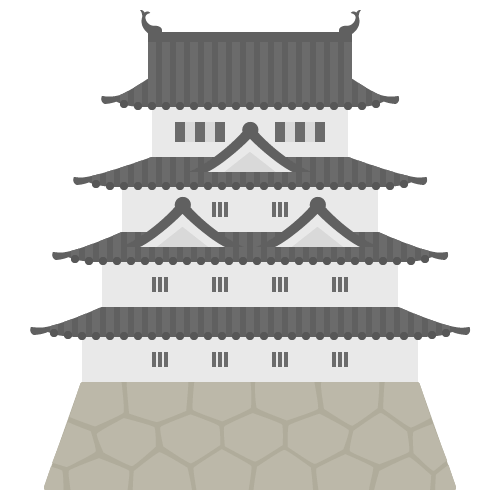
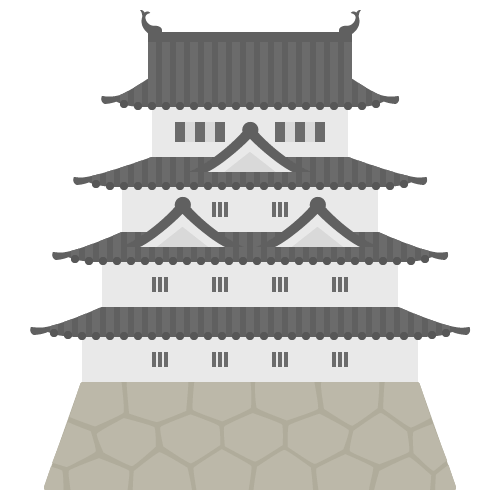
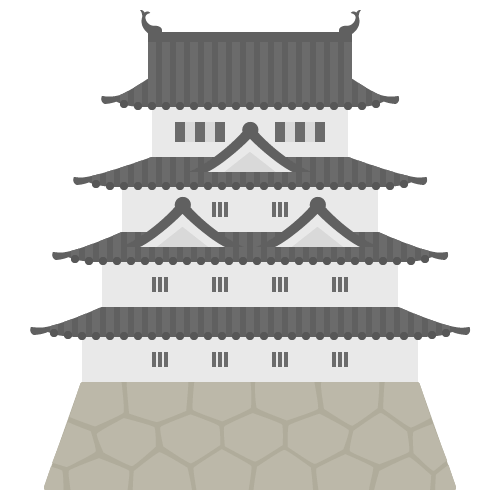
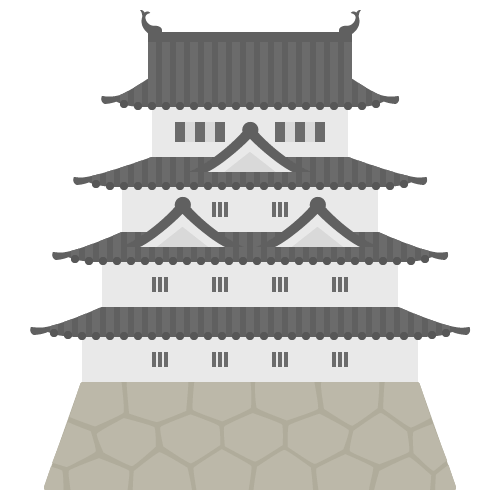
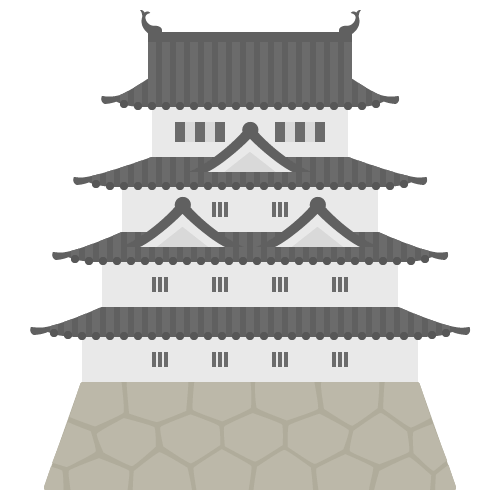
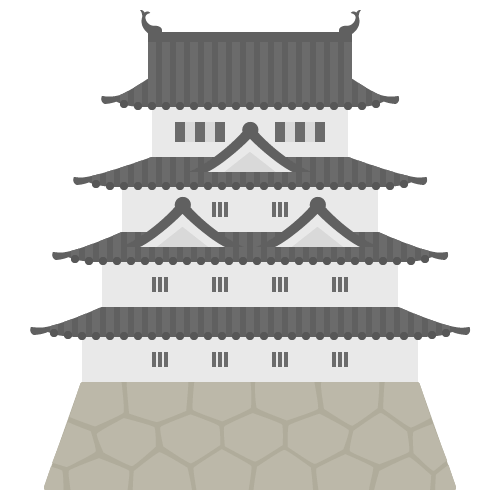
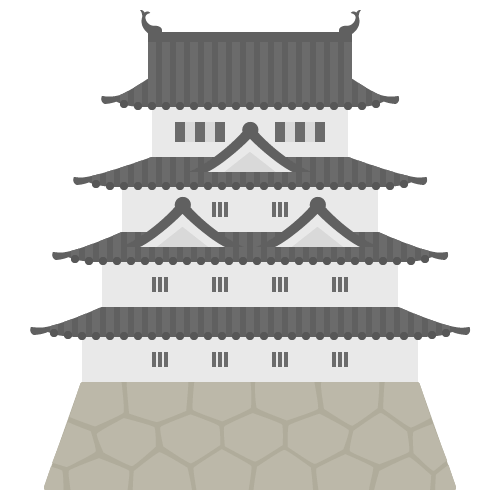
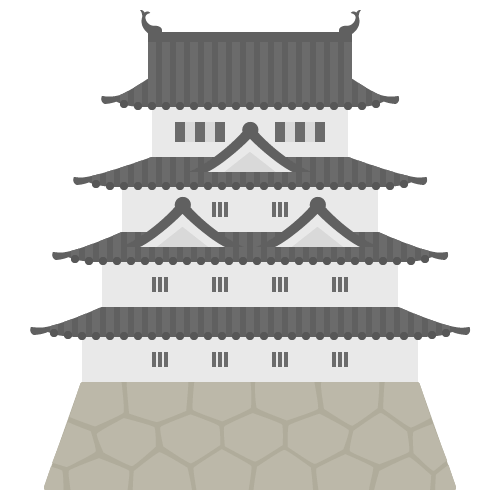
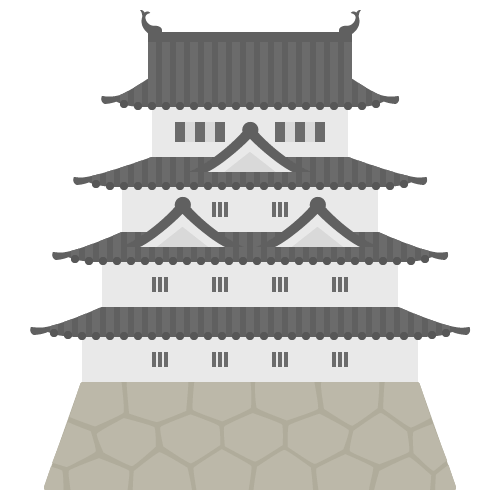
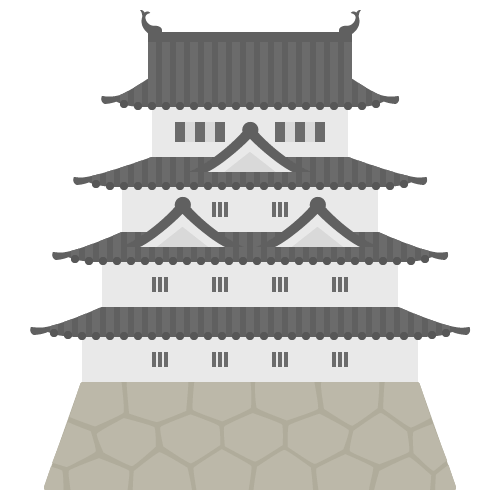
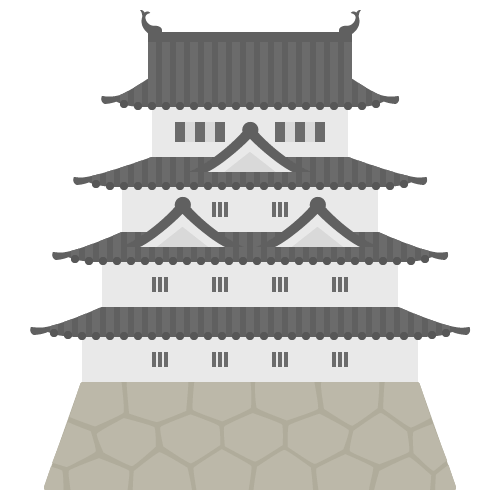
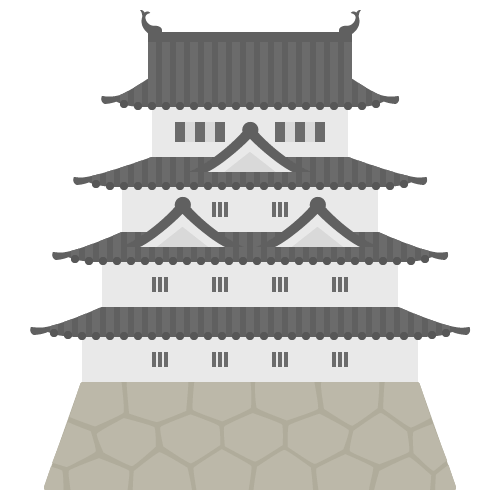
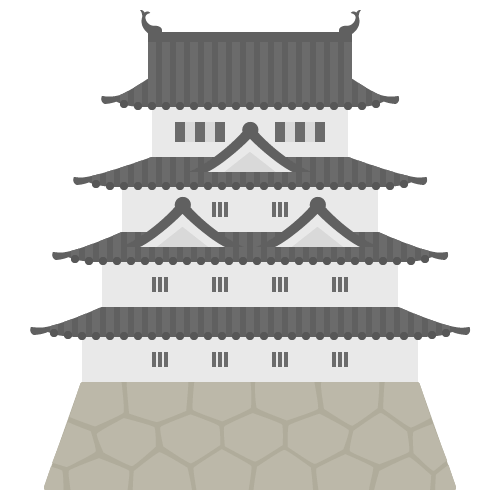
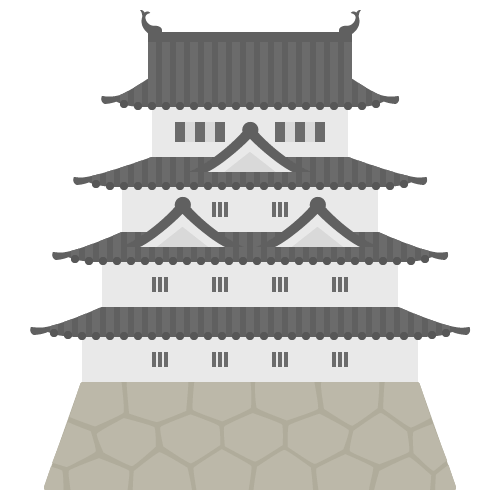
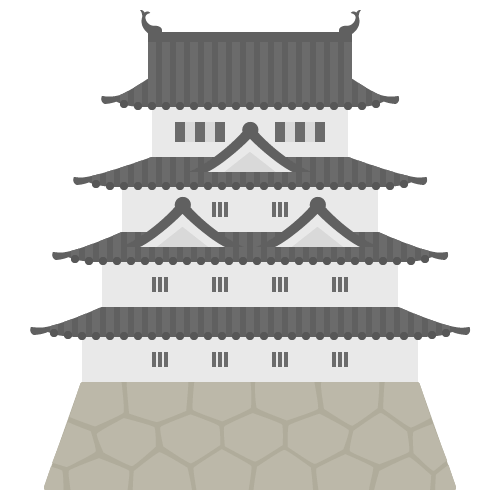
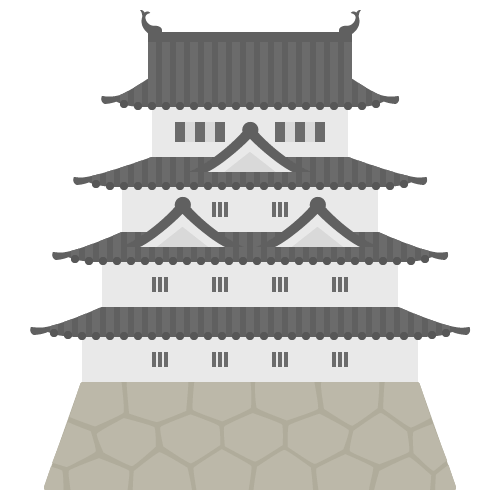
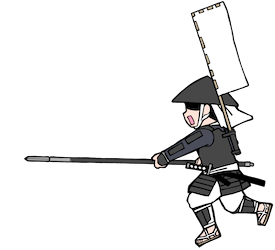
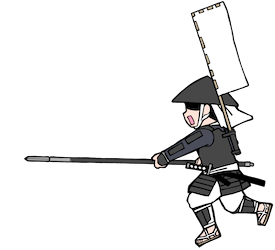
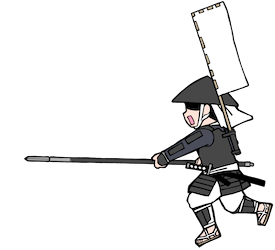
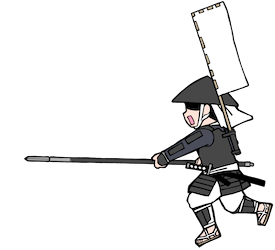
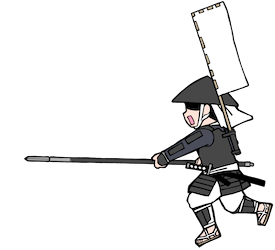
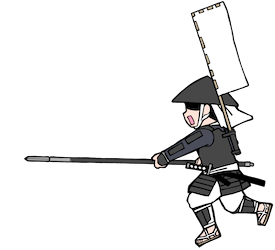
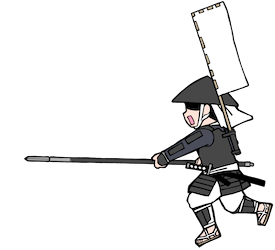
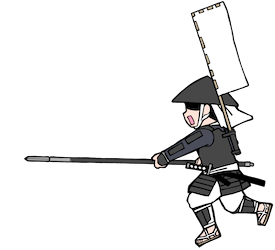
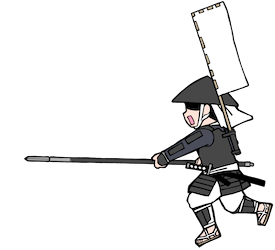
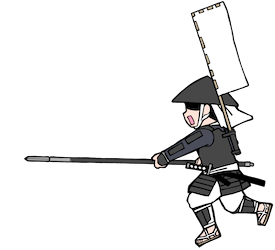
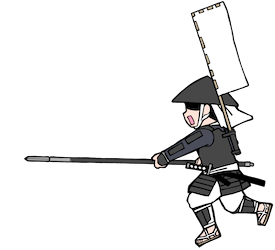
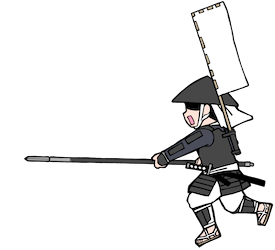
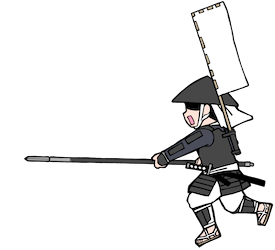
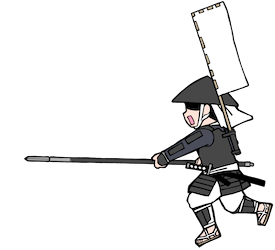
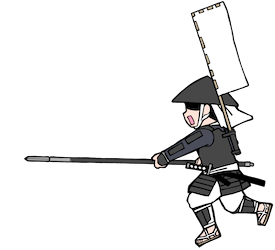
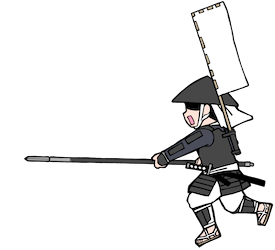
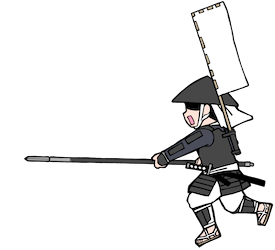
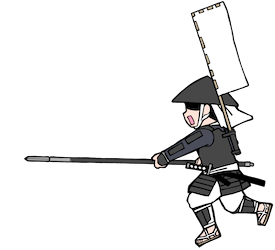
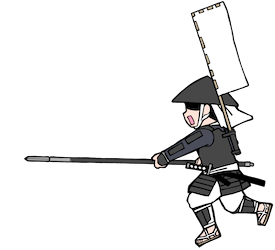
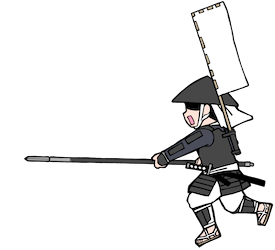
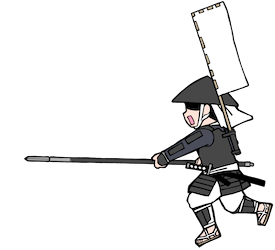
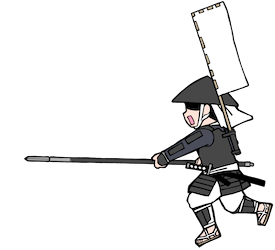
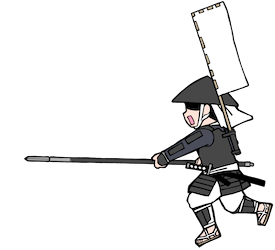
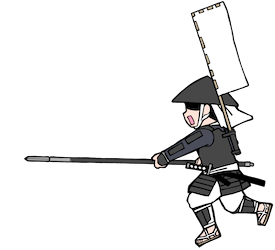
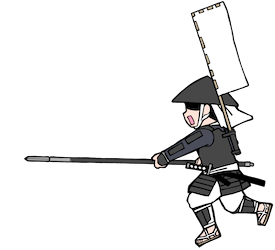
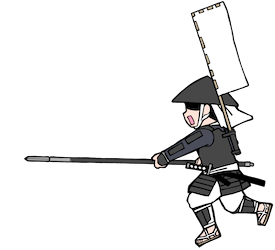
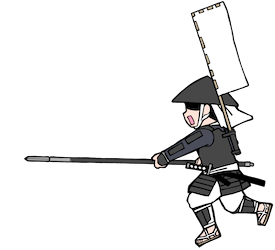
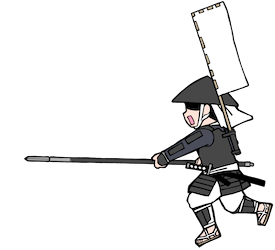
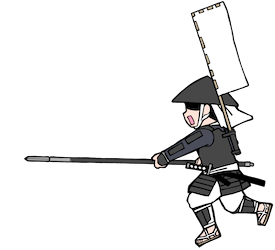
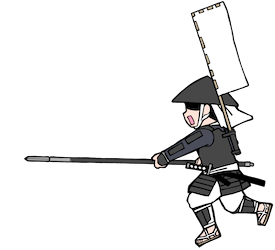
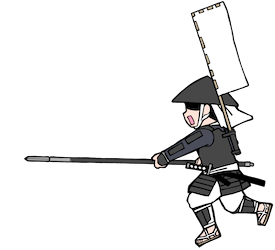
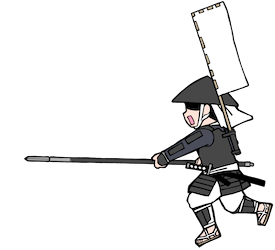

In [154]:
import folium
from folium.features import CustomIcon

#mapの生成
map = folium.Map(location=[location_df['緯度'][0], location_df['経度'][0]], zoom_start=7, tiles='OpenStreetMap')

#各拠点線で結ぶ
line = [
    (location_df.iloc[i]['緯度'], location_df.iloc[i]['経度'])
    for i in range(len(location_df))
       ]
folium.PolyLine(locations=line, color='red').add_to(map)



#各拠点の表示
for i in range(len(location_df)):
  #画像をアイコンにする
  shiro= '/content/drive/MyDrive/Colab Notebooks/kizunakai/2212_walking_event/shiro_icon.png'
  icon = CustomIcon(
      icon_image = shiro,
      icon_size = (50, 50))
  folium.Marker(radius=150, 
                location=[location_df.iloc[i]['緯度'], location_df.iloc[i]['経度']],
                tooltip=f"ポイント{i+1}：{str(location_df.iloc[i]['武将'])}",
                #popup=location_df.iloc[i]['URL'],
                icon=icon,
                ).add_to(map)

#各teamを配置
#まずどの区間にいるかをplaceで判別
for i in range(len(team_df)):
  walk = team_df['walk'][i]
  if walk < location_df.iloc[1]['歩数']:
    place=0
  elif walk <= location_df.iloc[2]['歩数']:
    place=1
  elif walk <= location_df.iloc[3]['歩数']:
    place=2
  elif walk <= location_df.iloc[4]['歩数']:
    place=3
  elif walk <= location_df.iloc[5]['歩数']:
    place=4
  elif walk <= location_df.iloc[6]['歩数']:
    place=5
  elif walk <= location_df.iloc[7]['歩数']:
    place=6
  elif walk <= location_df.iloc[8]['歩数']:
    place=7
  elif walk <= location_df.iloc[9]['歩数']:
    place=8
  elif walk <= location_df.iloc[10]['歩数']:
    place=9
  elif walk <= location_df.iloc[11]['歩数']:
    place=10
  elif walk <= location_df.iloc[12]['歩数']:
    place=11
  elif walk <= location_df.iloc[13]['歩数']:
    place=12
  elif walk <= location_df.iloc[14]['歩数']:
    place=13
  elif walk <= location_df.iloc[15]['歩数']:
    place=14
  else:
    place=15

  if place <15:
    d_walk = walk - location_df['歩数'][place]
    ratio = d_walk/(location_df['歩数'][place+1]-location_df['歩数'][place])
    loc = [((location_df['緯度'][place+1]-location_df['緯度'][place])*ratio+location_df['緯度'][place]), 
          ((location_df['経度'][place+1]-location_df['経度'][place])*ratio+location_df['経度'][place])]
    #画像をアイコンにする
    ashigaru= '/content/drive/MyDrive/Colab Notebooks/kizunakai/2212_walking_event/ashigaru4.png'
    icon = CustomIcon(
           icon_image = ashigaru,
           icon_size = (40, 40))
    folium.Marker(radius=400, 
                  location=loc, 
                  icon=icon,
                  #icon=folium.Icon(color='red'),赤ポイントにする場合はこれにする。
                  tooltip=f"{team_df['team'][i]}_{location_df['全石高'][place]}万石_{location_df['コメント'][place]}"
                  ).add_to(map)

  else:
    loc = [location_df['緯度'][15], location_df['経度'][15]]
    #画像をアイコンにする
    ashigaru= '/content/drive/MyDrive/Colab Notebooks/kizunakai/2212_walking_event/ashigaru4.png'
    icon = CustomIcon(
           icon_image = ashigaru,
           icon_size = (40, 40))
    folium.Marker(radius=400,
                  location=loc,
                  icon=icon,
                  #icon=folium.Icon(color='red'),赤ポイントにする場合はこれにする。
                  tooltip=f"{team_df['team'][i]}_{location_df['全石高'][place]}万石_{location_df['コメント'][place]}"
                  ).add_to(map)    

#mapの表示
map

In [155]:
#save
map.save('2022walking_event2.html')

# 動作確認用

In [139]:
import folium
from folium.features import CustomIcon
from folium import plugins
import branca

#mapの生成
map = folium.Map(location=[location_df['緯度'][0], location_df['経度'][0]], zoom_start=7, tiles='OpenStreetMap')

#各拠点線で結ぶ
line = [
    (location_df.iloc[i]['緯度'], location_df.iloc[i]['経度'])
    for i in range(len(location_df))
       ]
folium.PolyLine(locations=line, color='red').add_to(map)

#各拠点の表示
for i in range(len(location_df)):
  #画像をアイコンにする
  shiro= '/content/drive/MyDrive/Colab Notebooks/kizunakai/2212_walking_event/shiro_icon.png'
  icon = CustomIcon(
    icon_image = shiro,
    icon_size = (50, 50),
    #icon_anchor = (30, 30),
    #shadow_image = shadow_img, # 影効果（今回は使用せず コメントアウト
    #shadow_size = (30, 30),
    #shadow_anchor = (-4, -40),
    #popup_anchor = (3, 3)
     )
  folium.Marker(location=[location_df.iloc[i]['緯度'], location_df.iloc[i]['経度']],
                tooltip=str(location_df.iloc[i]['武将']),
                icon=icon
                ).add_to(map)

# ポップアップの設置
#url=location_df.iloc[0]['URL']
#html=f'<a href={url}> 🌞気象庁☔ 兵庫県の天気予報 </a>'
#iframe = branca.element.IFrame(html=html, width=300, height=500)
#popup = folium.Popup(location_df.iloc[0]['URL'], max_width=100)


#各teamを配置
#まずどの区間にいるかをplaceで判別
for i in range(len(team_df)):
  walk = team_df['walk'][i]
  if walk < location_df.iloc[1]['歩数']:
    place=0
  elif walk <= location_df.iloc[2]['歩数']:
    place=1
  elif walk <= location_df.iloc[3]['歩数']:
    place=2
  elif walk <= location_df.iloc[4]['歩数']:
    place=3
  elif walk <= location_df.iloc[5]['歩数']:
    place=4
  elif walk <= location_df.iloc[6]['歩数']:
    place=5
  elif walk <= location_df.iloc[7]['歩数']:
    place=6
  elif walk <= location_df.iloc[8]['歩数']:
    place=7
  elif walk <= location_df.iloc[9]['歩数']:
    place=8
  elif walk <= location_df.iloc[10]['歩数']:
    place=9
  elif walk <= location_df.iloc[11]['歩数']:
    place=10
  elif walk <= location_df.iloc[12]['歩数']:
    place=11
  elif walk <= location_df.iloc[13]['歩数']:
    place=12
  elif walk <= location_df.iloc[14]['歩数']:
    place=13
  elif walk <= location_df.iloc[15]['歩数']:
    place=14
  else:
    place=15

  if place <15:
    d_walk = walk - location_df['歩数'][place]
    ratio = d_walk/(location_df['歩数'][place+1]-location_df['歩数'][place])
    loc = [((location_df['緯度'][place+1]-location_df['緯度'][place])*ratio+location_df['緯度'][place]), 
          ((location_df['経度'][place+1]-location_df['経度'][place])*ratio+location_df['経度'][place])]
    comment=f"{team_df['team'][i]}_{location_df['全石高'][place]}万石_{location_df['コメント'][place]}"
    tooltip = folium.Tooltip(comment)  

    #画像をアイコンにする
    ashigaru= '/content/drive/MyDrive/Colab Notebooks/kizunakai/2212_walking_event/ashigaru.png'
    icon = CustomIcon(
           icon_image = ashigaru,
           icon_size = (40, 40),
            #icon_anchor = (30, 30),
            #shadow_image = shadow_img, # 影効果（今回は使用せず コメントアウト
            #shadow_size = (30, 30),
            #shadow_anchor = (-4, -40),
            #popup_anchor = (3, 3)
            )
    folium.Marker(radius=400, 
                  location=loc, 
                  icon=icon,
                  tooltip=tooltip).add_to(map)
  else:
    loc = [location_df['緯度'][15], location_df['経度'][15]]
    folium.Marker(radius=400, location=loc, icon=folium.Icon(color='red'),
                    tooltip=team_df['team'][i]).add_to(map)    

#mapの表示
map

Output hidden; open in https://colab.research.google.com to view.

In [95]:
team_df['team'][i]

'team_32'

In [75]:
#save
map.save('map.html')

一旦

In [147]:
import folium
from folium.features import CustomIcon

#mapの生成
map = folium.Map(location=[location_df['緯度'][0], location_df['経度'][0]], zoom_start=7, tiles='OpenStreetMap')

#画像をアイコンにする
shiro= '/content/drive/MyDrive/Colab Notebooks/kizunakai/2212_walking_event/shiro_icon.png'
icon = CustomIcon(
    icon_image = shiro,
    #icon_size = (100, 100),
    #icon_anchor = (30, 30),
    #shadow_image = shadow_img, # 影効果（今回は使用せず コメントアウト
    #shadow_size = (30, 30),
    #shadow_anchor = (-4, -40),
    #popup_anchor = (3, 3)
)

#各拠点の表示
for i in range(len(location_df)):
    folium.Marker(radius=150, 
                  location=[location_df.iloc[i]['緯度'], location_df.iloc[i]['経度']],
                  tooltip=str(location_df.iloc[i]['武将']),
                  #icon=icon,
                  ).add_to(map)

#各拠点線で結ぶ
line = [
    (location_df.iloc[i]['緯度'], location_df.iloc[i]['経度'])
    for i in range(len(location_df))
       ]
folium.PolyLine(locations=line, color='red').add_to(map)

#各teamを配置
#まずどの区間にいるかをplaceで判別
for i in range(len(team_df)):
  walk = team_df['walk'][i]
  if walk < location_df.iloc[1]['歩数']:
    place=0
  elif walk <= location_df.iloc[2]['歩数']:
    place=1
  elif walk <= location_df.iloc[3]['歩数']:
    place=2
  elif walk <= location_df.iloc[4]['歩数']:
    place=3
  elif walk <= location_df.iloc[5]['歩数']:
    place=4
  elif walk <= location_df.iloc[6]['歩数']:
    place=5
  elif walk <= location_df.iloc[7]['歩数']:
    place=6
  elif walk <= location_df.iloc[8]['歩数']:
    place=7
  elif walk <= location_df.iloc[9]['歩数']:
    place=8
  elif walk <= location_df.iloc[10]['歩数']:
    place=9
  elif walk <= location_df.iloc[11]['歩数']:
    place=10
  elif walk <= location_df.iloc[12]['歩数']:
    place=11
  elif walk <= location_df.iloc[13]['歩数']:
    place=12
  elif walk <= location_df.iloc[14]['歩数']:
    place=13
  elif walk <= location_df.iloc[15]['歩数']:
    place=14
  else:
    place=15

  if place <15:
    d_walk = walk - location_df['歩数'][place]
    ratio = d_walk/(location_df['歩数'][place+1]-location_df['歩数'][place])
    loc = [((location_df['緯度'][place+1]-location_df['緯度'][place])*ratio+location_df['緯度'][place]), 
          ((location_df['経度'][place+1]-location_df['経度'][place])*ratio+location_df['経度'][place])]
    folium.Marker(radius=400, location=loc, icon=folium.Icon(color='red'),
                    tooltip=team_df['team'][i]).add_to(map)
  else:
    loc = [location_df['緯度'][15], location_df['経度'][15]]
    folium.Marker(radius=400, location=loc, icon=folium.Icon(color='red'),
                    tooltip=team_df['team'][i]).add_to(map)    

#mapの表示
map